# Metaheuristics Framework
--------------------------------
### Notebook 1 - Simple Metaheuristics

In [1]:
cd ..

d:\Git\dir\ICO\codes


## Imports

In [3]:
# Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Metaheuristics Framework Library
from metaheuristics.simulated_annealing import SimulatedAnnealing
from metaheuristics.tabu_search import TabuSearch
from metaheuristics.algorithme_genetique import GeneticAlgorithm
from metaheuristics.variable_neighborhood_descent import VariableNeighborhoodDescent

# Problem modeled with the Metaheuristics Framework
from loading_models import load_solomon
from vrptw import VRPTW, FlexVRPTW
from flowshop import FlowShop, load_flowshop

ModuleNotFoundError: No module named 'metaheuristics.algorithme_genetique'

## Problem Instanciation
Choose a problem to work on

#### VRPTW

In [14]:
vrptw_data = load_solomon('A50.csv', nb_cust=None, vehicle_speed=100)
problem = VRPTW(vrptw_data)

#### FlexibleVRPTW

In [4]:
vrptw_data = load_solomon('A50.csv', nb_cust=None, vehicle_speed=100)
problem = FlexVRPTW(vrptw_data)

#### Machine Flow Shop Scheduling Problem

In [ ]:
flowshop_data = load_flowshop('FS10x100.csv')
problem = FlowShop(flowshop_data)

In [ ]:
problem.print_class_params()

## Neighborhood lab for VRPTW


### Utils for VRPTW demostration

In [5]:
def reduce_solution(s, N, it=10):
    new_sol = s
    for i in range(it):
        new_sol = N.delete_smallest_route(new_sol)
    return new_sol

def print_different_route(s1, s2):
    s1, s2 = s1.routes, s2.routes
    if len(s1) != len(s2):
        return
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            print('found differt route in index', i)
            print(s1[i])
            print(s2[i])

def hard_equal(a, b):
    return not set([tuple(l) for l in a]) ^ set([tuple(l) for l in b])

In [6]:
N = vrptw.neighborhood({'verbose': 0, 'choose_mode': 'crossover'})
s1, s2 = N.initial_solution(), N.initial_solution()
s1, s2 = reduce_solution(s1, N), reduce_solution(s2, N)
s3, s4 = N.get_neighbor_from_two(s1, s2)
print('cost s1 =', s1.cost(), 'cost s2 =', s2.cost())
print("cost s1' =", s3.cost(), "cost s2' =", s4.cost())
print('s1 improved by', s1.cost() - s3.cost())
print('s2 improved by', s2.cost() - s4.cost())
print('s1 equal s3 =', s1==s3)
print('s2 equal s4 =', s2==s4)
print('is s3 valid ?', s3.checker(), '| is s4 valid ?', s4.checker())
print()
print_different_route(s1, s3)
print()
print_different_route(s2, s4)

NameError: name 'vrptw' is not defined

In [ ]:
N = problem.neighborhood({'verbose': 0, 'use_methods': [1,2,3,4,5,6,7,8], 'force_new_sol': True, 'full_search': False})
sol = N.initial_solution()
s = sol
# s = reduce_solution(s, it=10)

In [ ]:
redN = problem.neighborhood()
s = reduce_solution(s, redN, it=30)

In [ ]:
s

In [ ]:
print(f'cost = {s.cost()}')
# print(s)
s2 = N(s)
print(f'cost = {s2.cost()}')
# print(s2)
print('solutions exactly equal:', hard_equal(s.routes, s2.routes))
print('improved by', s.cost() - s2.cost())
print_different_route(s, s2)
print('is s1 valid ?', s.checker(), '| is s2 valid ?', s2.checker())

In [ ]:
# s = reduce_solution(s)

In [ ]:
s.plot_graph(arrows=True, figsize=8)

# Metaheuristics Lab

### Initial solution for every metaheuristic

cost of initial solution = 22068.604944725037


  0%|          | 0/100 [03:48<?, ?it/s]


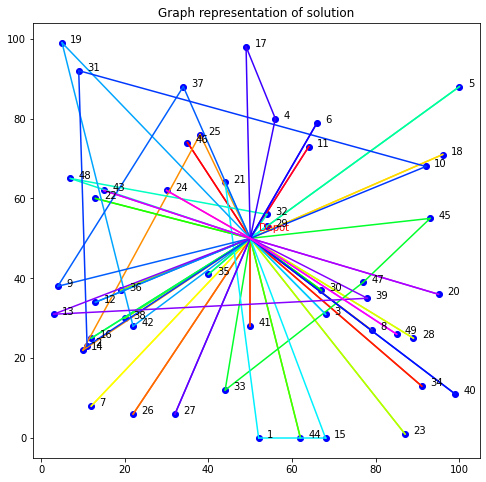

In [15]:
N = problem.neighborhood()
init_sol = N.initial_solution()
print('cost of initial solution =', init_sol.cost())
init_sol.plot_graph(figsize=8)

In [16]:
if isinstance(problem, VRPTW) or isinstance(problem, FlexVRPTW):
    neighborhood_params={'verbose': 0,
                         'init_sol': init_sol,
                         'choose_mode': 'random',
                         'use_methods': [1, 2, 3, 4, 5, 6, 7, 8],
                         'force_new_sol': True,
                         'full_search': True}
    print('Using VRPTW neighborhood params')
    
elif isinstance(problem, FlowShop):
    neighborhood_params={'verbose': 0,
                         'init_sol': init_sol,
                         'choose_mode': 'random',
                         'use_methods': [1, 2],
                         'force_new_sol': True}
    print('Using Machine Flow Shop Scheduling Problem neighborhood params')

Using VRPTW neighborhood params


## Simulated Annealing

In [17]:
rs = SimulatedAnnealing(t0=20, progress_bar=True, neighborhood_params=neighborhood_params)
rs_sol = rs.fit_search(problem)
rs_sol

Cost: 5898.26:   0%|          | 0/100 [00:00<?, ?it/s]          


[[0, 20, 40, 49, 28, 8, 47, 0],
 [0, 16, 7, 26, 27, 41, 0],
 [0, 9, 14, 2, 13, 12, 29, 0],
 [0, 32, 6, 5, 18, 45, 30, 0],
 [0, 25, 48, 43, 22, 36, 35, 11, 0],
 [0, 42, 38, 24, 0],
 [0, 21, 46, 37, 31, 19, 17, 0],
 [0, 4, 10, 39, 15, 44, 0],
 [0, 3, 34, 23, 33, 1, 0]]

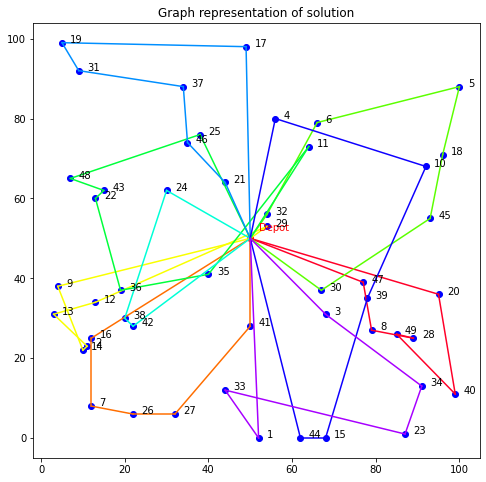

In [18]:
rs_sol.plot_graph(figsize=8)

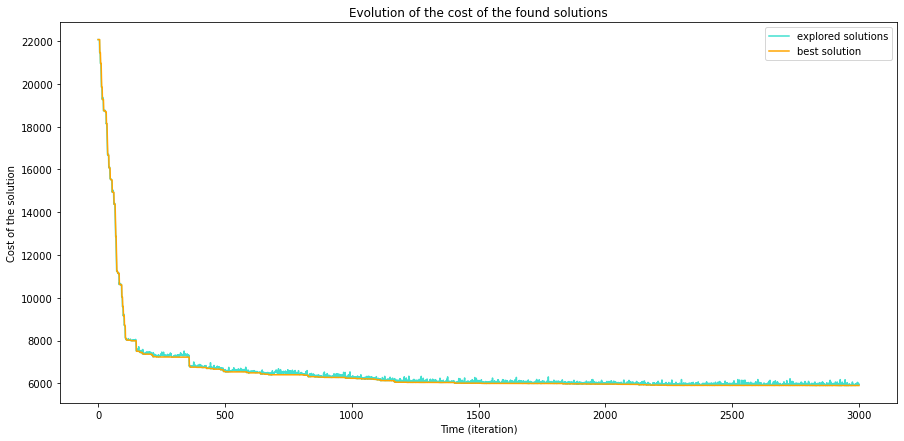

In [19]:
rs.plot_evolution_cost(figsize=(15,7))

## Tabu Search

In [20]:
ts = TabuSearch(progress_bar=True, neighborhood_params=neighborhood_params)
tabu_sol = ts.fit_search(problem)
tabu_sol

Cost: 7638.87: 100%|██████████| 100/100 [00:00<00:00, 765.19it/s]


[[0, 8, 20, 29, 0],
 [0, 39, 16, 25, 37, 19, 7, 0],
 [0, 5, 45, 42, 31, 0],
 [0, 48, 18, 10, 44, 27, 36, 0],
 [0, 2, 1, 33, 0],
 [0, 3, 32, 21, 28, 35, 0],
 [0, 41, 49, 11, 23, 47, 24, 0],
 [0, 46, 40, 38, 43, 12, 0],
 [0, 34, 4, 6, 30, 17, 13, 0],
 [0, 9, 22, 26, 14, 15, 0]]

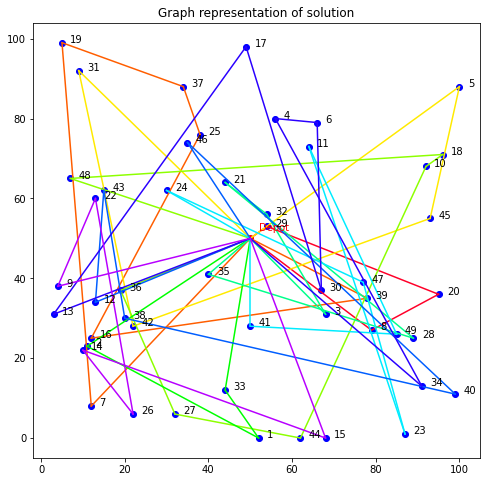

In [21]:
tabu_sol.plot_graph(figsize=8)

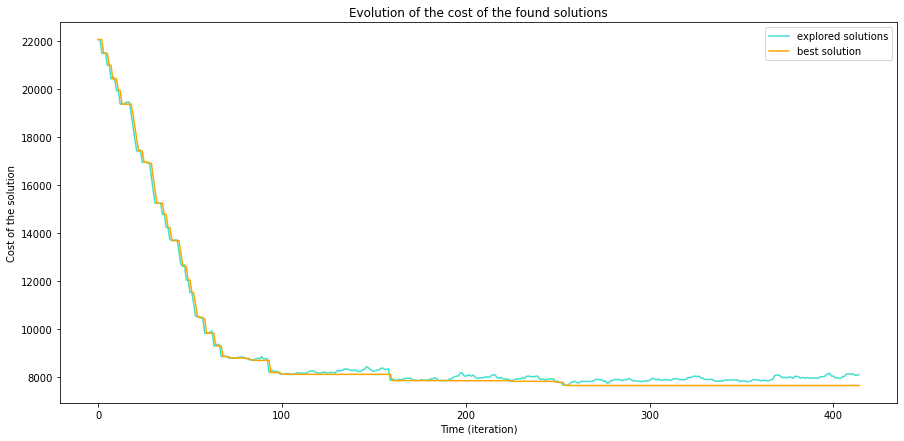

In [22]:
ts.plot_evolution_cost(figsize=(15,7))

## Genetic Algorithm

In [23]:
ga = GeneticAlgorithm(num_evolu_per_search=200, rate_mutation=0.3, progress_bar=True)
ga_sol = ga.fit_search(problem)
# print('cost =', ga_sol.cost())
ga_sol

Cost: 8423.59: 100%|██████████| 200/200 [00:38<00:00,  5.23it/s] 


[[0, 34, 14, 39, 49, 23, 47, 0],
 [0, 6, 31, 11, 41, 24, 46, 0],
 [0, 5, 36, 38, 3, 15, 21, 0],
 [0, 9, 48, 44, 18, 0],
 [0, 10, 42, 30, 29, 8, 0],
 [0, 19, 12, 26, 0],
 [0, 1, 45, 13, 28, 0],
 [0, 43, 20, 33, 40, 0],
 [0, 32, 27, 7, 0],
 [0, 25, 4, 16, 17, 35, 0],
 [0, 22, 37, 2, 0]]

In [24]:
for _ in range(1):
    ga.search()

Cost: 7807.46: 100%|██████████| 200/200 [00:44<00:00,  4.53it/s]


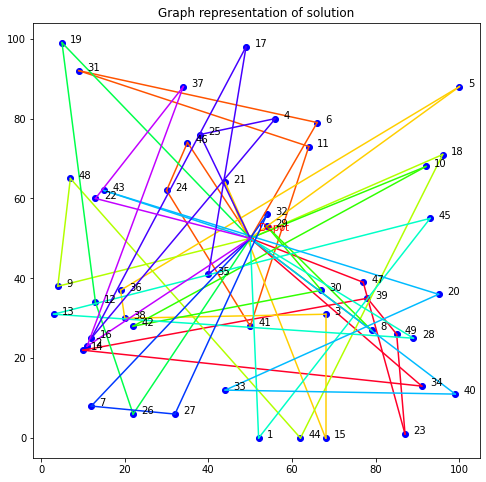

In [25]:
ga_sol.plot_graph(figsize=8)

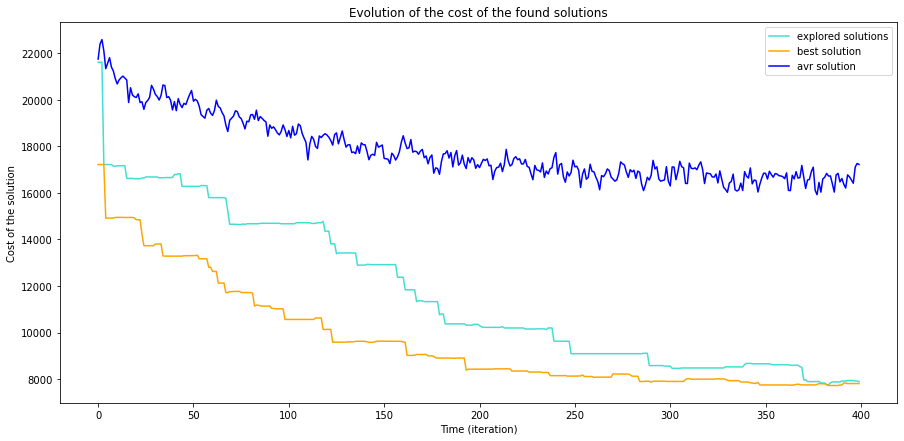

In [26]:
ga.plot_evolution_cost(figsize=(15,7))

## Variable Neighborhood Descent

In [ ]:
vns = VariableNeighborhoodDescent()
vns_sol = vns.fit_search(problem)
print('cost of VNS solution found =', vns_sol.cost())

In [ ]:
vns_sol.plot_graph(figsize=8)

In [ ]:
vns.plot_evolution_cost(figsize=(15,7))

# Comparaisons

In [ ]:
def compare_solutions(init_sol, solutions, names):
    init_cost = init_sol.cost()
    costs = list(map(lambda s: s.cost(), solutions))
    plt.bar(names, costs, color='b', width=0.3, label='cost of solution found by metaheuristic')
    plt.plot([init_cost]*len(solutions), c='r', label='cost of initial solution')
    plt.title('Comparison of solutions found by different metaheuristics')
    plt.ylabel('Cost')
    plt.legend()
    
def plot_models_evolution(models, names, crop_until=None):
    for model, name in zip(models, names):
        plt.plot(model.evolution_best_solution, label=name)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost of solution')
    plt.title('Evolution of solution cost for different metaheuristics')
    plt.legend()

In [ ]:
solutions = [rs_sol, tabu_sol, ga_sol, vns_sol]
models = [rs, ts, ga, vns]
names = ['Simulated Annealing', 'Tabu Search', 'Genetic Algorithm', 'VNS']

In [ ]:
compare_solutions(init_sol, solutions, names)

In [ ]:
plot_models_evolution(models, names)